In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.utils import resample

In [2]:
#loading dataset
data=pd.read_csv(r"E:\data trained projects\Evaluation Projects\assignment 1\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.shape

(1470, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
attrition_n=pd.DataFrame(data['Attrition'].value_counts())
attrition_n

,Attrition
No,1233
Yes,237


In [10]:
# check categorical column
for column in data.columns:
    if data[column].dtype==object:
        print(str(column)+ " : "+str(data[column].unique()))
        print(data[column].value_counts())
        print('-------------------------------------')
    

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
-------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-------------------------------------
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
-------------------------------------

In [11]:
#coorelation matrix
#plt.figure(figsize=(20,10))
#sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
#plt.show()

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

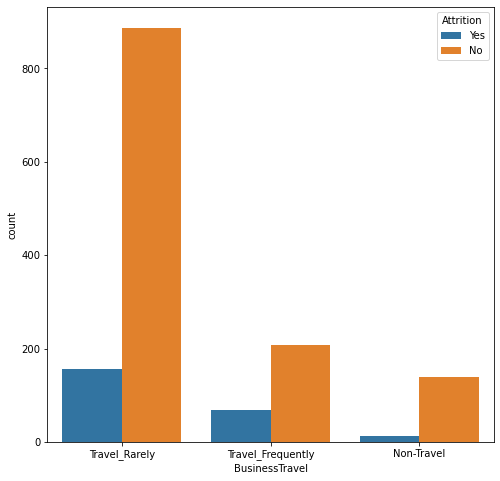

In [12]:
plt.figure(figsize=(8,8))
sns.countplot('BusinessTravel',hue='Attrition',data=data)

<AxesSubplot:xlabel='Department', ylabel='count'>

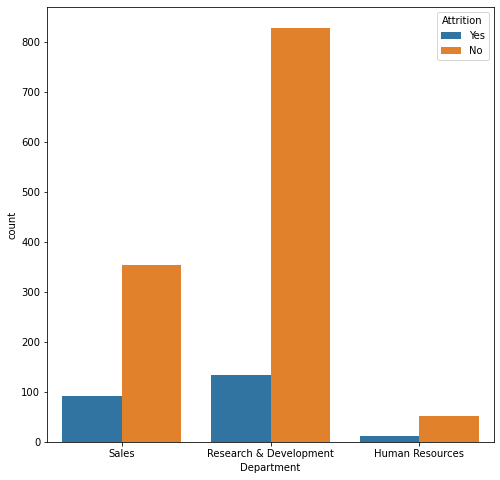

In [13]:
plt.figure(figsize=(8,8))
sns.countplot('Department',hue='Attrition',data=data)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

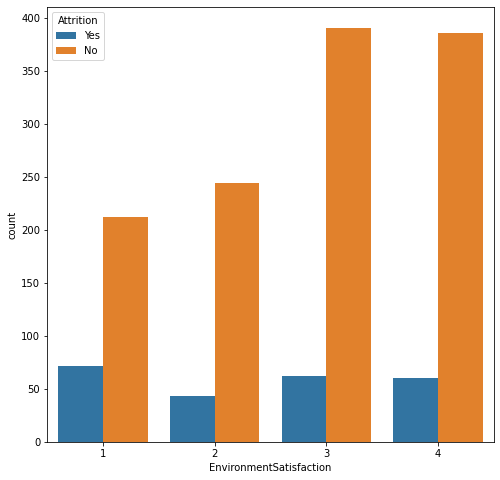

In [14]:
#Attrition from EnvironmentSatisfaction is very much similar as compared to levels.so, this features does not affect much to attrition.
# hence,this will be droped.
plt.figure(figsize=(8,8))
sns.countplot('EnvironmentSatisfaction',hue='Attrition',data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

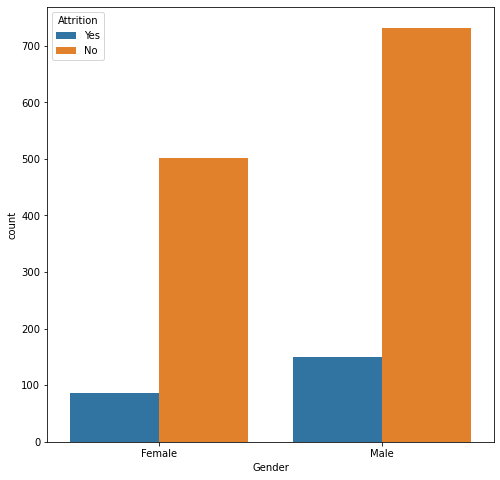

In [15]:
plt.figure(figsize=(8,8))
sns.countplot('Gender',hue='Attrition',data=data)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

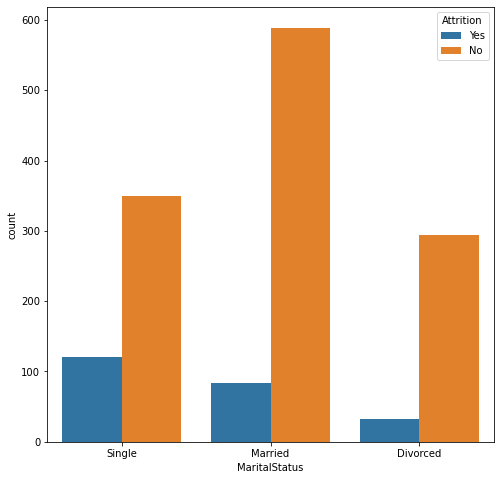

In [16]:
plt.figure(figsize=(8,8))
sns.countplot('MaritalStatus',hue='Attrition',data=data)

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

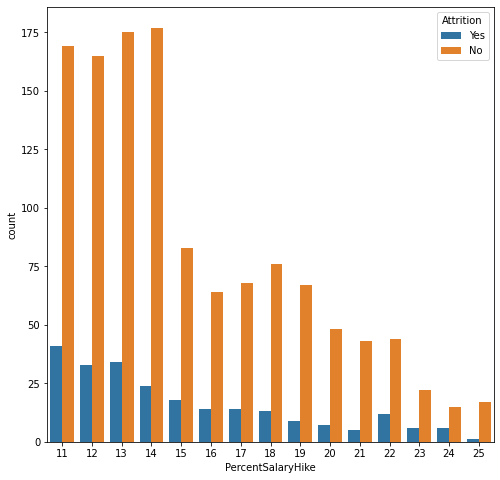

In [17]:
plt.figure(figsize=(8,8))
sns.countplot('PercentSalaryHike',hue='Attrition',data=data)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

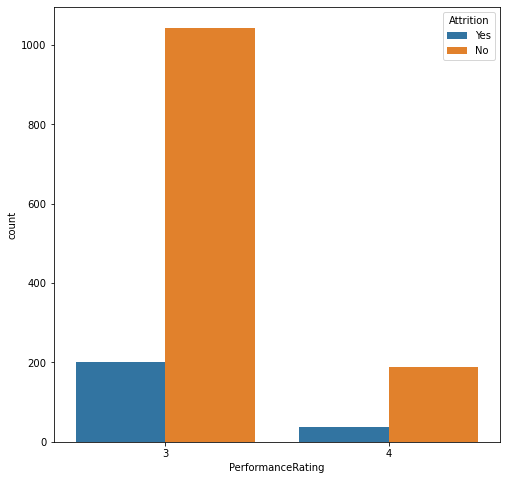

In [18]:
plt.figure(figsize=(8,8))
sns.countplot('PerformanceRating',hue='Attrition',data=data)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

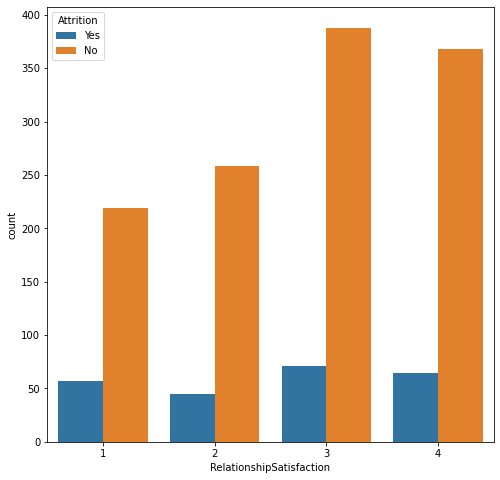

In [19]:
plt.figure(figsize=(8,8))
sns.countplot('RelationshipSatisfaction',hue='Attrition',data=data)

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

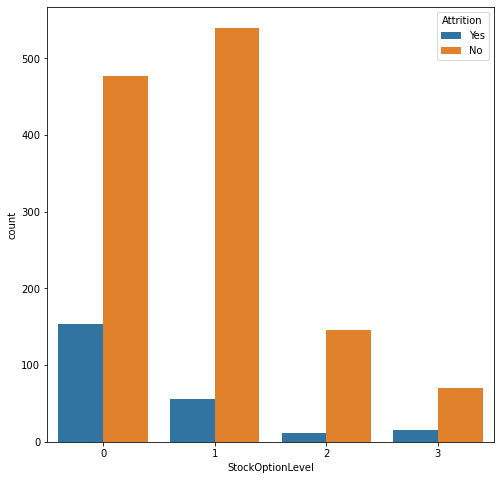

In [20]:
plt.figure(figsize=(8,8))
sns.countplot('StockOptionLevel',hue='Attrition',data=data)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

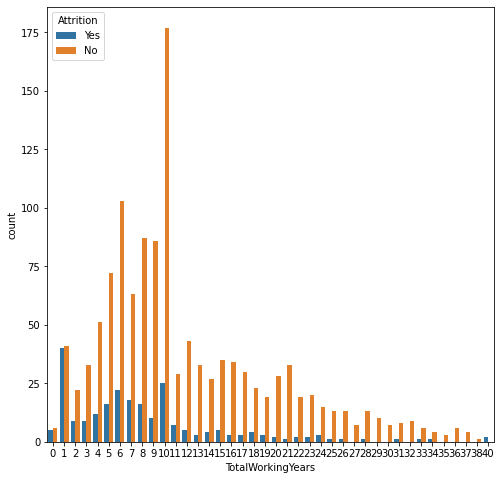

In [21]:
plt.figure(figsize=(8,8))
sns.countplot('TotalWorkingYears',hue='Attrition',data=data)

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

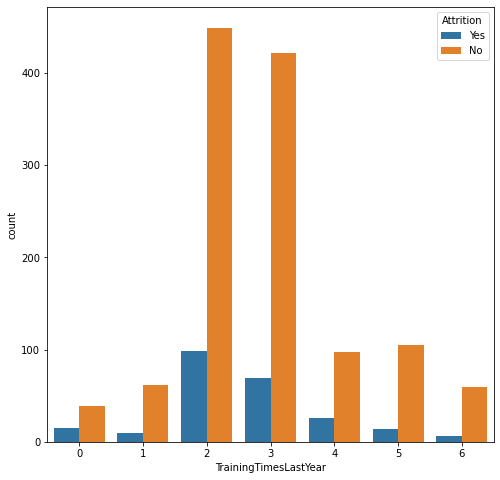

In [22]:
plt.figure(figsize=(8,8))
sns.countplot('TrainingTimesLastYear',hue='Attrition',data=data)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

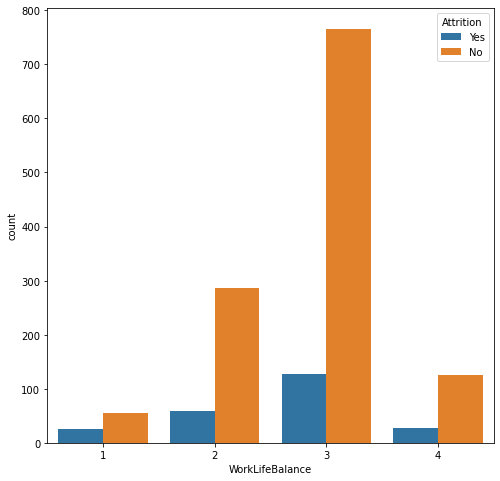

In [23]:
plt.figure(figsize=(8,8))
sns.countplot('WorkLifeBalance',hue='Attrition',data=data)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

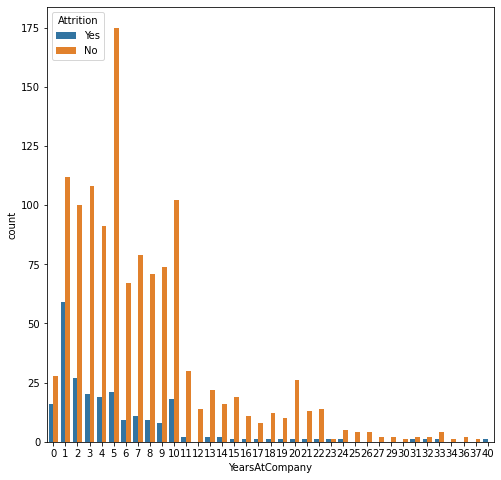

In [24]:
plt.figure(figsize=(8,8))
sns.countplot('YearsAtCompany',hue='Attrition',data=data)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

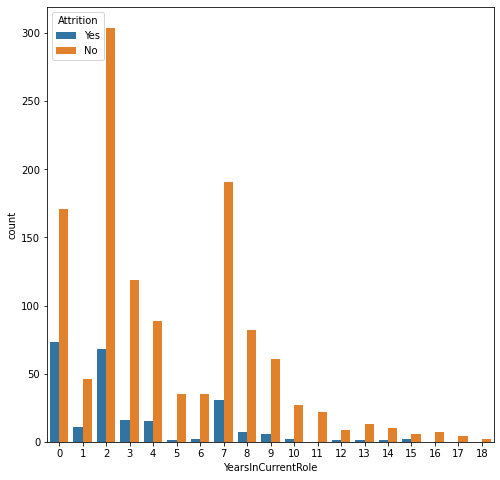

In [25]:
plt.figure(figsize=(8,8))
sns.countplot('YearsInCurrentRole',hue='Attrition',data=data)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

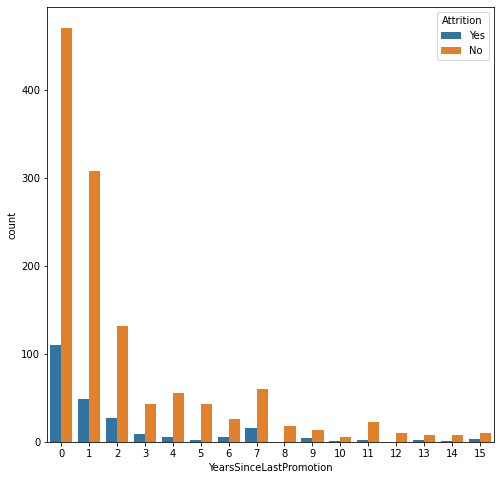

In [26]:
plt.figure(figsize=(8,8))
sns.countplot('YearsSinceLastPromotion',hue='Attrition',data=data)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

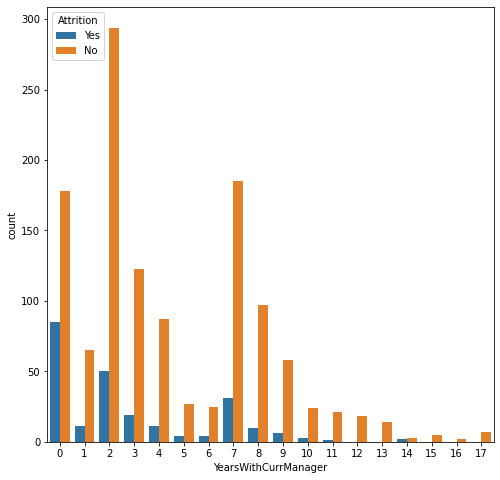

In [27]:
plt.figure(figsize=(8,8))
sns.countplot('YearsWithCurrManager',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

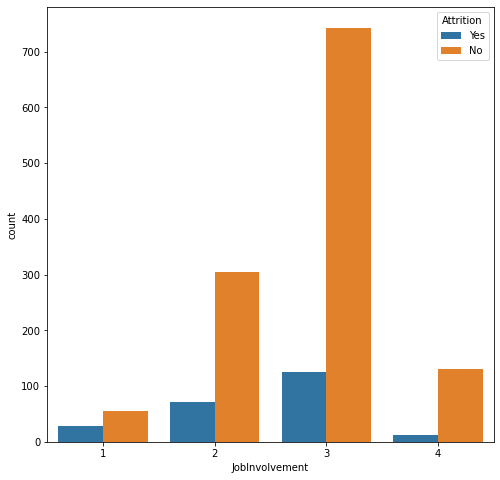

In [28]:
plt.figure(figsize=(8,8))
sns.countplot('JobInvolvement',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

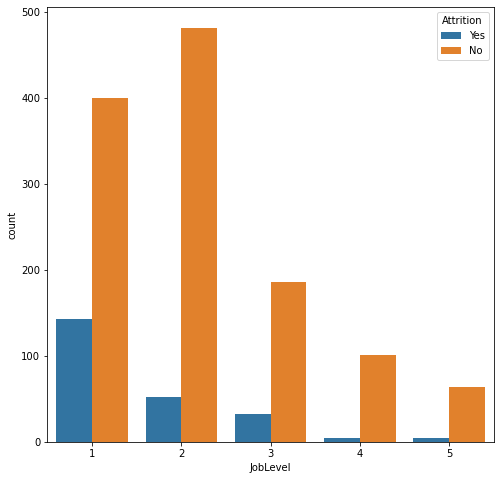

In [29]:
plt.figure(figsize=(8,8))
sns.countplot('JobLevel',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

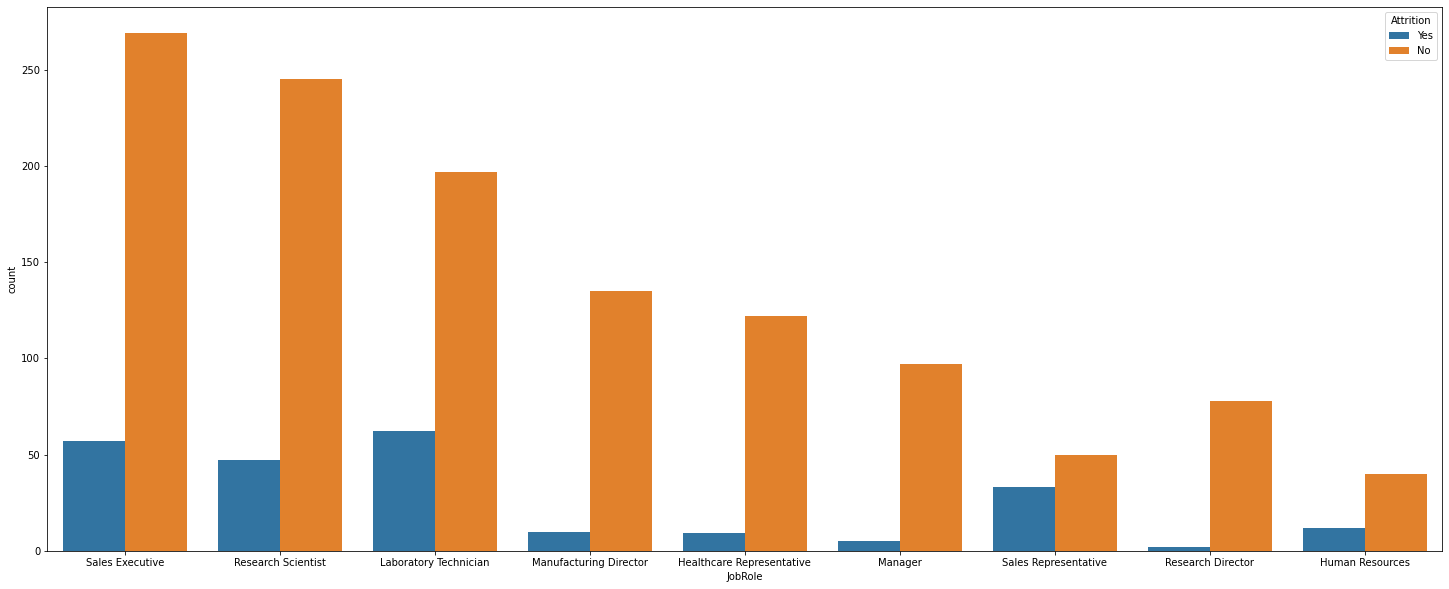

In [30]:
plt.figure(figsize=(25,10))
sns.countplot('JobRole',hue='Attrition',data=data)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

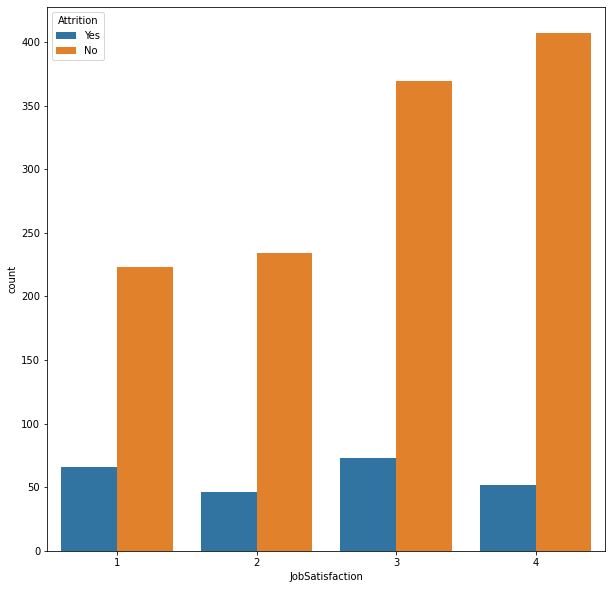

In [31]:
plt.figure(figsize=(10,10))
sns.countplot('JobSatisfaction',hue='Attrition',data=data)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

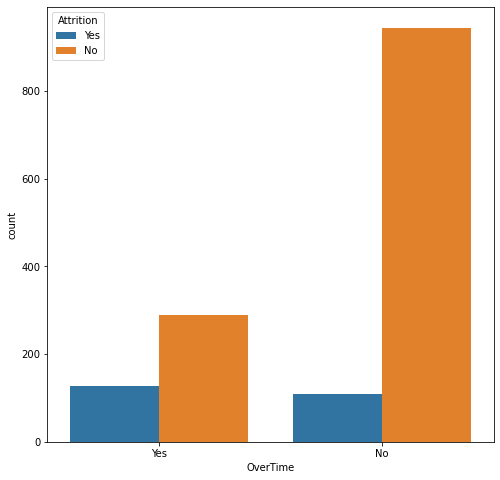

In [32]:
plt.figure(figsize=(8,8))
sns.countplot('OverTime',hue='Attrition',data=data)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

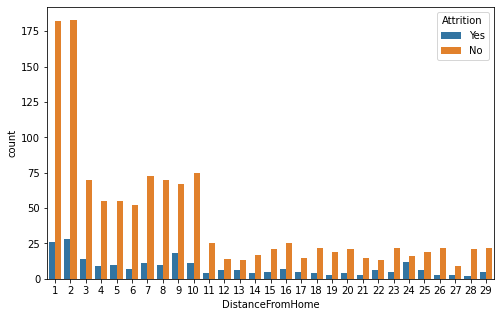

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('DistanceFromHome',hue='Attrition',data=data)

In [34]:
for column in data.columns:
    if data[column].dtype==object:
        print(str(column)+ " : "+str(data[column].unique()))
        print(data[column].value_counts())
        print('-------------------------------------')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
-------------------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-------------------------------------
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
-------------------------------------

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    else:
         data[column]=le.fit_transform(data[column])

In [38]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,0,1465,...,2,0,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,0,1466,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,0,1467,...,1,0,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,0,1468,...,3,0,0,17,3,1,9,6,0,8


In [39]:
x=data.drop(columns=['Attrition'])
y=data['Attrition']

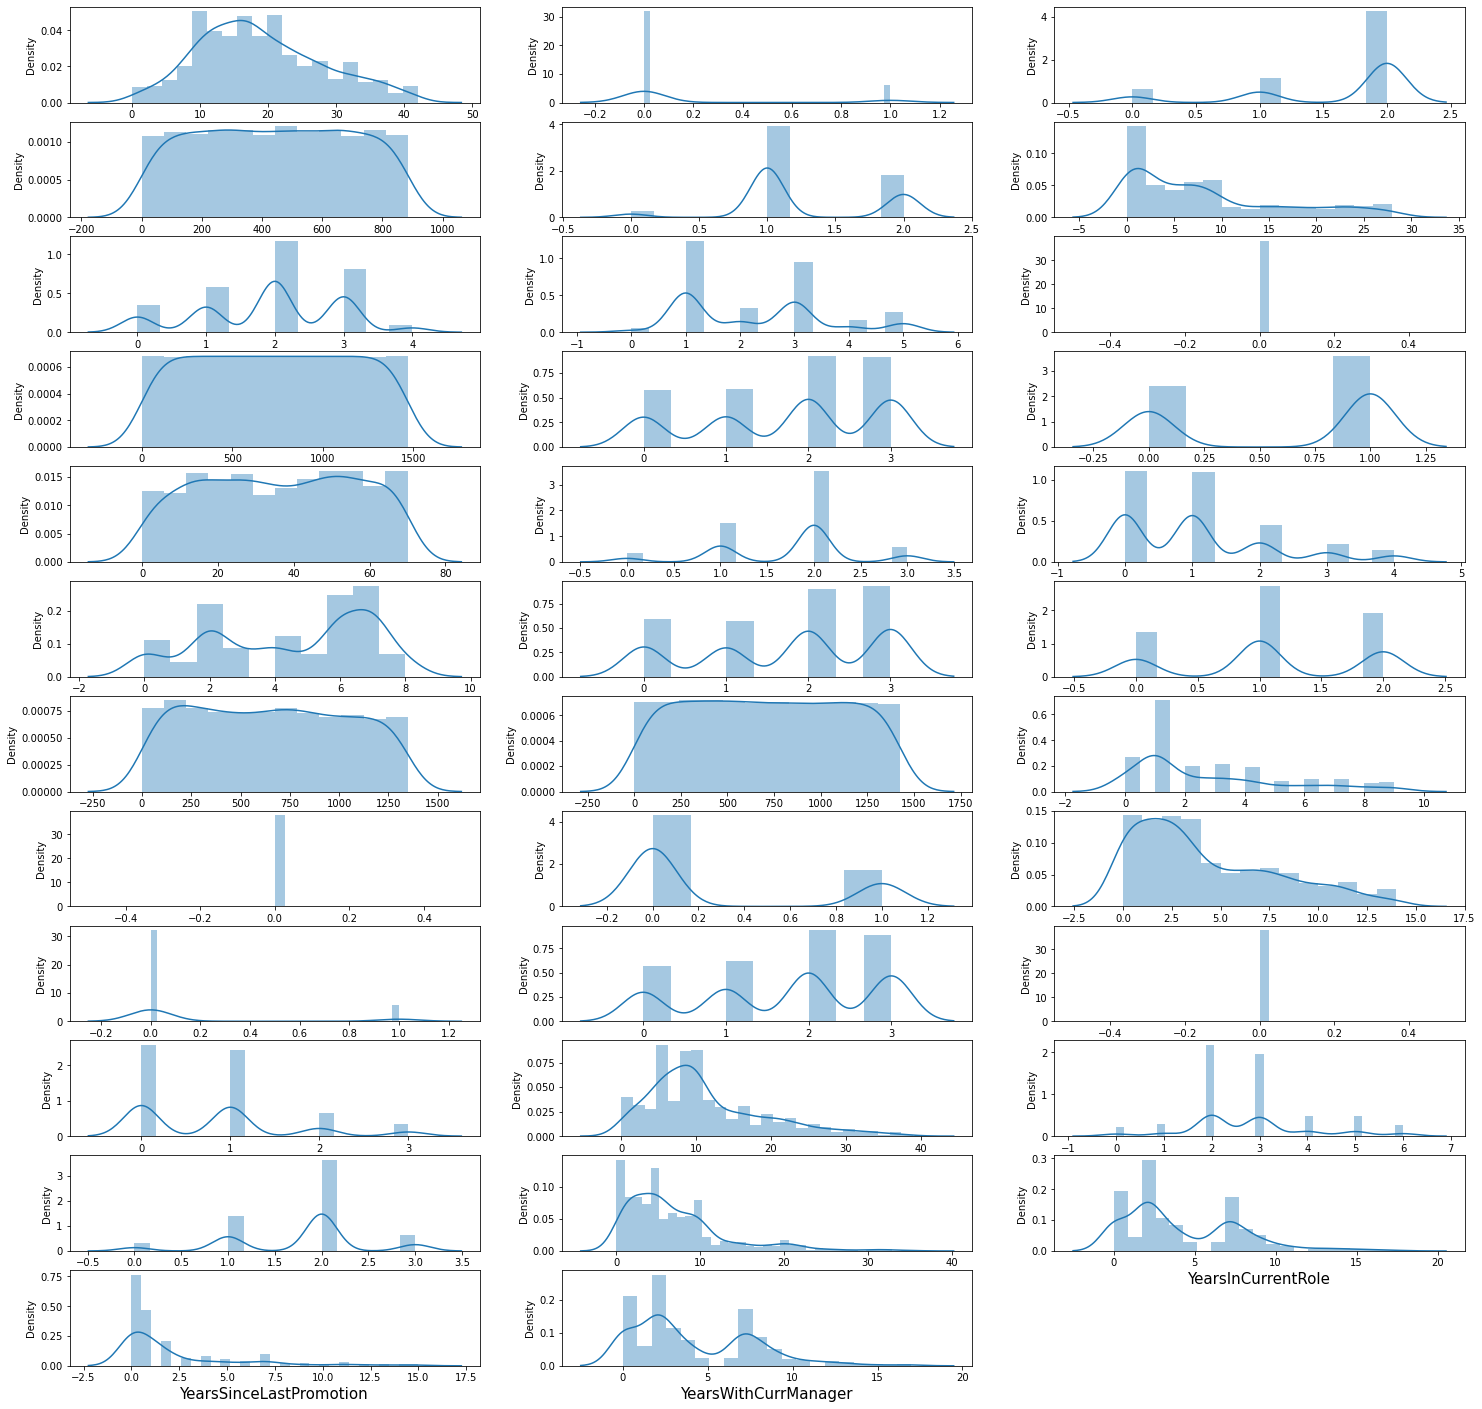

In [40]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=35:
        ax=plt.subplot(12,3,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
x_scaled=scaler.fit_transform(x)

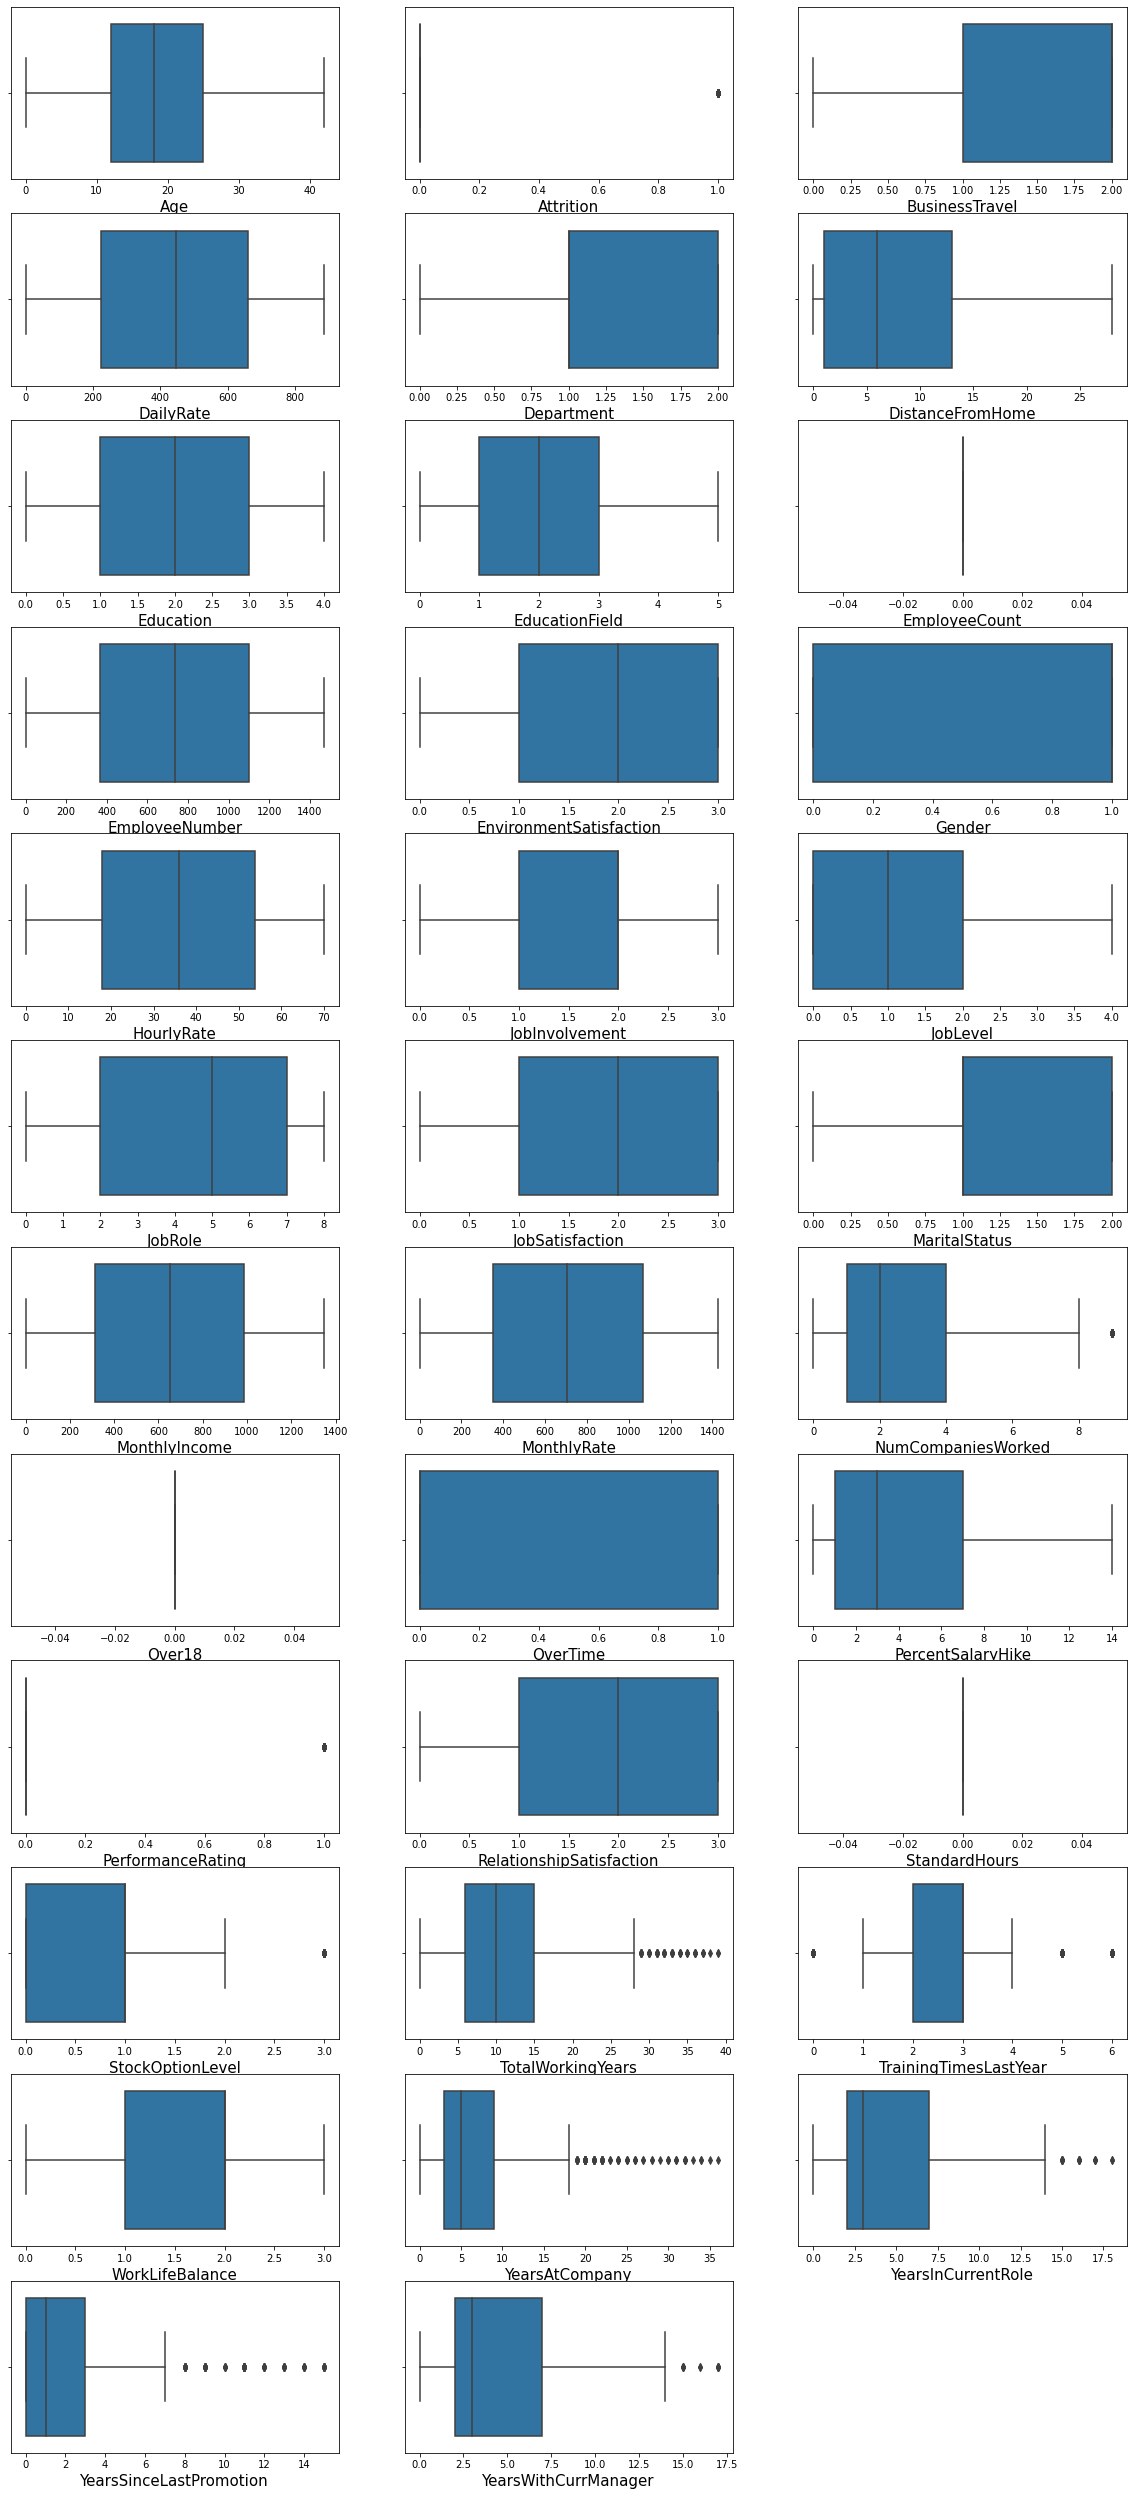

In [44]:
plt.figure(figsize=(20,45))
graph=1
for column in data:
    if graph<=35:
        ax=plt.subplot(12,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [45]:
from scipy.stats import zscore
z_score=zscore(data[['PerformanceRating','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)

data=data[filtering_entry]

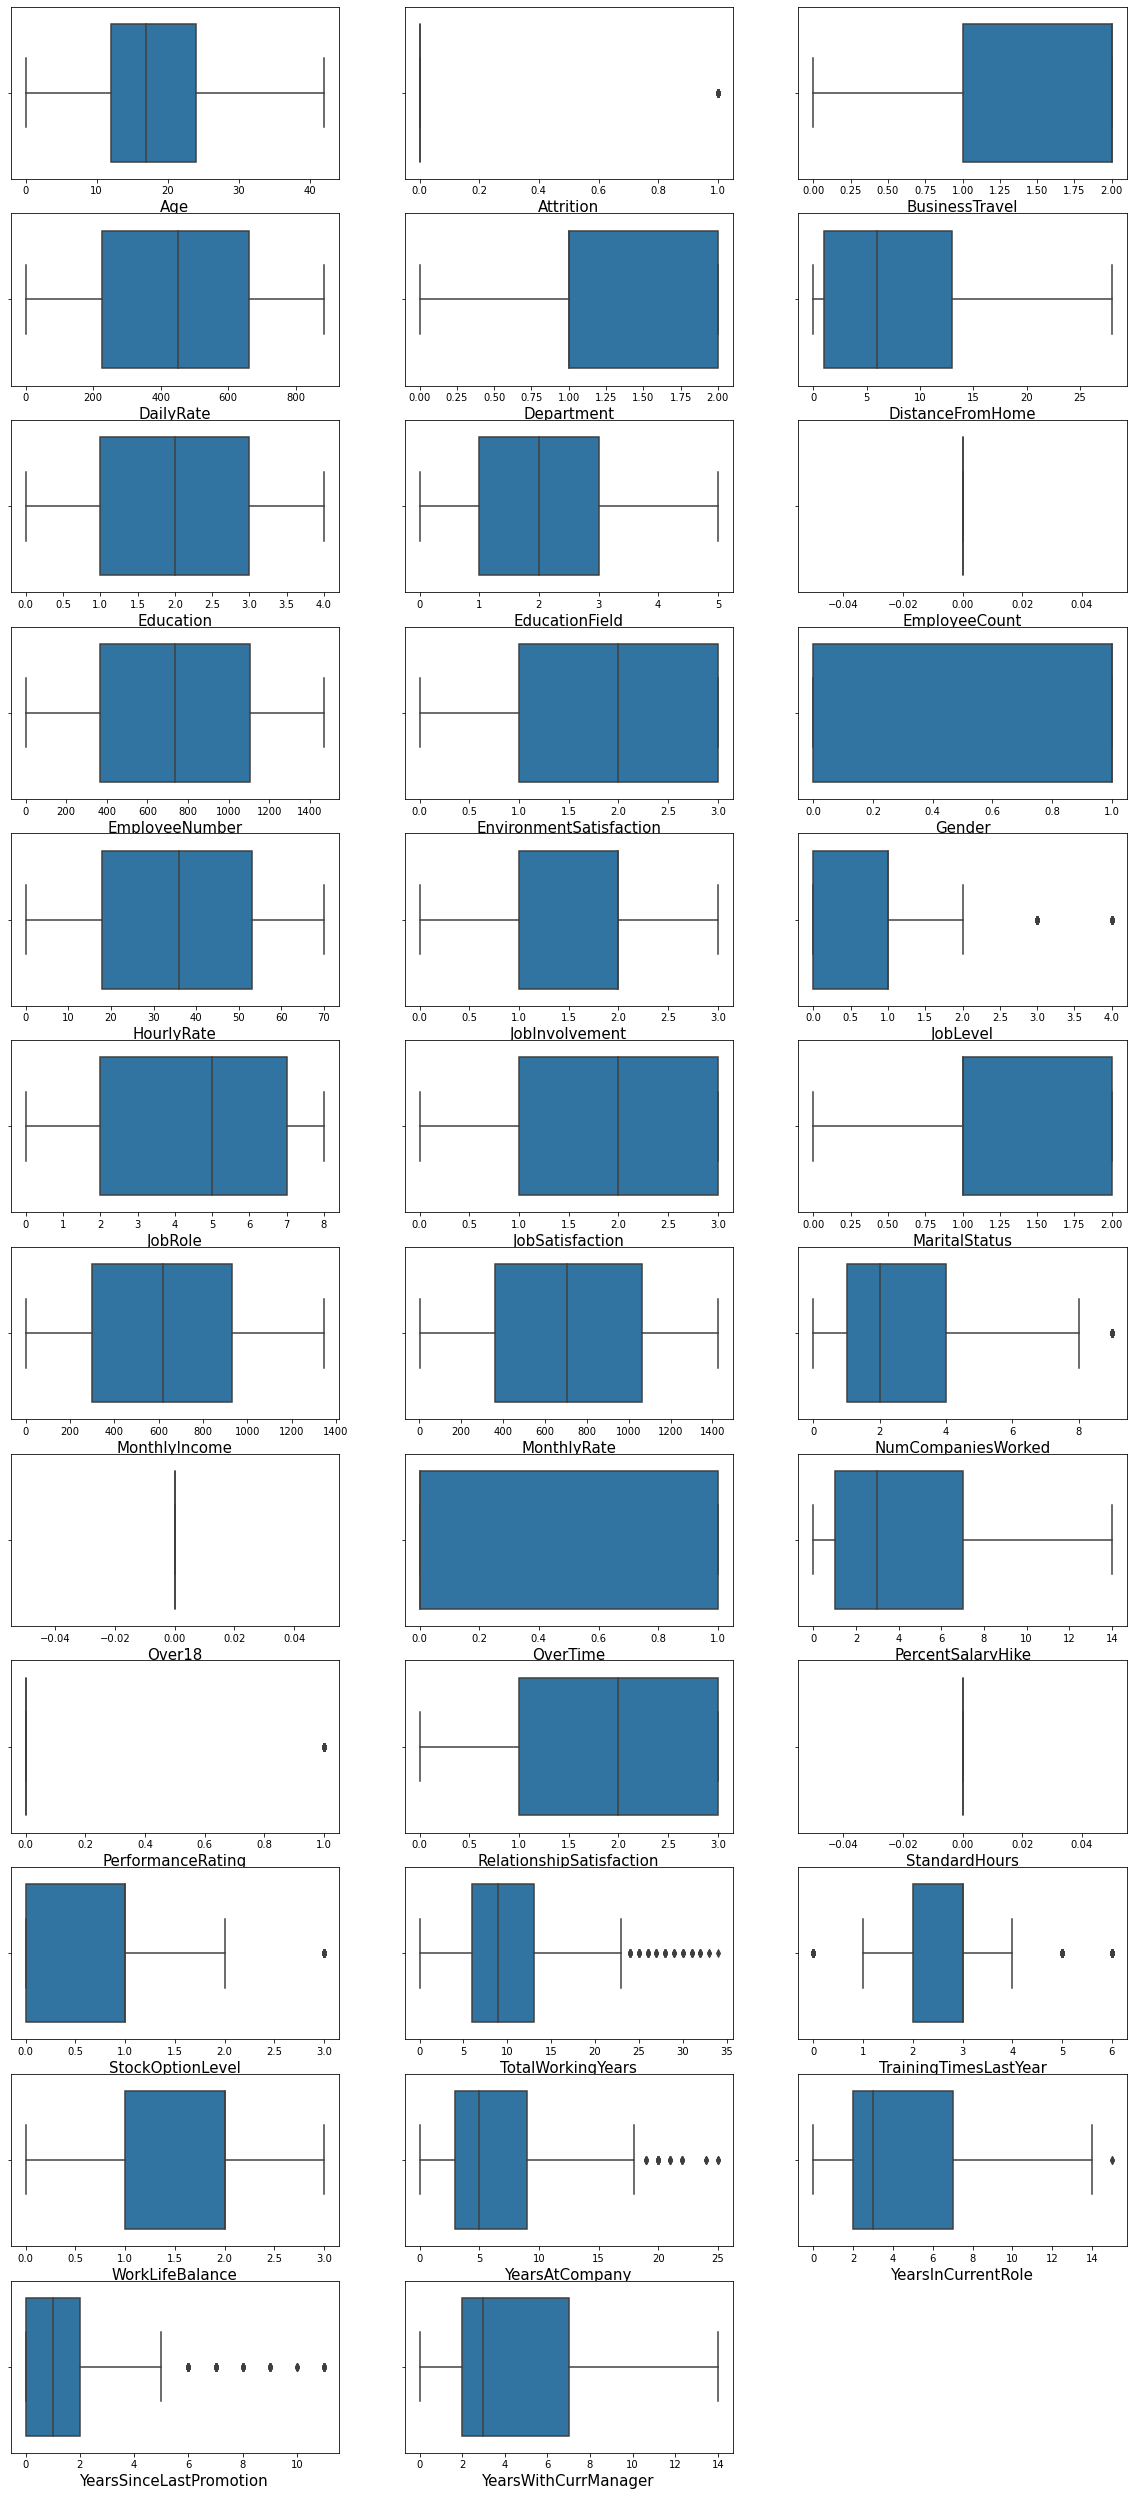

In [46]:
plt.figure(figsize=(20,45))
graph=1
for column in data:
    if graph<=35:
        ax=plt.subplot(12,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [47]:
data.shape

(1387, 35)

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=55)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
lr_pred=lr.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [55]:
accuracy=accuracy_score(y_test,lr_pred)
accuracy

0.8820861678004536

In [56]:
lr_cross_score=cross_val_score(lr,x,y,cv=5,scoring='accuracy').mean()
lr_cross_score

0.8421768707482993

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=KNeighborsClassifier()

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
knn_pred=knn.predict(x_test)

In [61]:
accuracy=accuracy_score(y_test,knn_pred)
accuracy

0.8684807256235828

In [62]:
knn_cross_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean()
knn_cross_score

0.8108843537414966

In [63]:
from sklearn.svm import SVC

In [64]:
svc=SVC()

In [65]:
svc.fit(x_train,y_train)

SVC()

In [66]:
svc_pred=svc.predict(x_test)

In [67]:
accuracy=accuracy_score(y_test,svc_pred)
accuracy

0.8775510204081632

In [68]:
svc_cross_score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
svc_cross_score

0.8387755102040817

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt=DecisionTreeClassifier()

In [71]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
dt_pred=dt.predict(x_test)

In [73]:
accuracy=accuracy_score(y_test,dt_pred)
accuracy

0.7596371882086168

In [74]:
dt_cross_score=cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean()
dt_cross_score

0.7761904761904763

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier()

In [77]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
rf_pred=rf.predict(x_test)

In [79]:
accuracy=accuracy_score(y_test,rf_pred)
accuracy

0.8684807256235828

In [80]:
rf_cross_score=cross_val_score(rf,x,y,cv=5,scoring='accuracy').mean()
rf_cross_score

0.8544217687074829

In [81]:
#from above analysis it show that difference between accuracy and cross validation score is lowest of random forest.
#Therefore, Random Forest is the best algorithm

In [90]:
# using Hypertunning parameter
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
params={'n_estimators':[13,15],
        'criterion':['entropy'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}
grd=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [91]:
best_parameters=grd.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [92]:
grd.best_score_

0.8542315889178308

In [93]:
from sklearn.metrics import plot_roc_curve

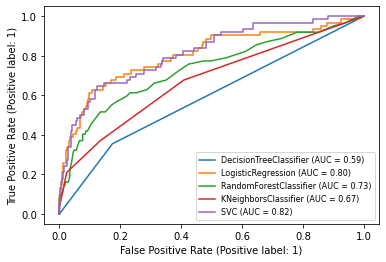

In [94]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

In [95]:
grd.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,